In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("data.xlsx")
df.head()

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales
0,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650 ml,2017,Apr,1960.0,4480.86
1,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650 ml,2017,Aug,1825.0,6518.77
2,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650 ml,2017,Dec,1825.0,8784.75
3,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650 ml,2017,Jul,1825.0,10894.42
4,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650 ml,2017,Jun,1825.0,7090.98


In [2]:
df['PackSize'] = df['PackSize'].str[0:3].astype('float64')
df.head()

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales
0,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Apr,1960.0,4480.86
1,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Aug,1825.0,6518.77
2,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Dec,1825.0,8784.75
3,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Jul,1825.0,10894.42
4,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Jun,1825.0,7090.98


In [3]:
df['revenue'] = df['Volume Sales'] / df['PackSize'] * df['W/s Price (per carton)']*1000
df.head()

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales,revenue
0,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Apr,1960.0,4480.86,1.351152e+07
1,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Aug,1825.0,6518.77,1.830270e+07
2,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Dec,1825.0,8784.75,2.466488e+07
3,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Jul,1825.0,10894.42,3.058818e+07
4,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Jun,1825.0,7090.98,1.990929e+07


In [4]:
df['Company/Competitor'].value_counts()

Competitor    2090
Company       1005
Name: Company/Competitor, dtype: int64

In [5]:
dfCompany = df[df['Company/Competitor']=="Company"]
dfCompetitor = df[df['Company/Competitor']=="Competitor"]

In [6]:
print(dfCompetitor["SKU"].value_counts())
print(dfCompany["SKU"].value_counts())

Series([], Name: SKU, dtype: int64)
CANL007     68
GLBTL009    68
GLBTL005    68
CANS005     68
CANL005     68
GLBTS001    68
GLBTL001    68
CANS001     68
GLBTL003    68
GLBTL002    68
GLBTL007    68
CANS007     68
CANL001     49
GLBTS006    39
GLBTL004    30
GLBTL008    26
CANL003     23
CANS009     22
Name: SKU, dtype: int64


In [7]:
def plot_volume_sales(sku):
  a = [2014,2015,2016,2017,2018,2019]
  df_sku= df[df['SKU']==sku];
  v = []
  for year in a:
    v.append(df_sku[df_sku['Year']==year]['Volume Sales'].sum())
  d = {'Year':[2014,2015,2016,2017,2018,2019],'Volume_Sales': v }
  df_sales = pd.DataFrame(d)
  plt.plot(df_sales["Year"],df_sales["Volume_Sales"],marker='o', linewidth=2, markersize=12)
  

In [8]:
def plot_revenue(sku):
  a = [2014,2015,2016,2017,2018,2019]
  df_sku= df[df['SKU']==sku];
  v = []
  for year in a:
    v.append(df_sku[df_sku['Year']==year]['revenue'].sum())
  d = {'Year':[2014,2015,2016,2017,2018,2019],'Revenue_total': v }
  df_sales = pd.DataFrame(d)
  plt.plot(df_sales["Year"],df_sales["Revenue_total"],marker='o', linewidth=2, markersize=12)
  

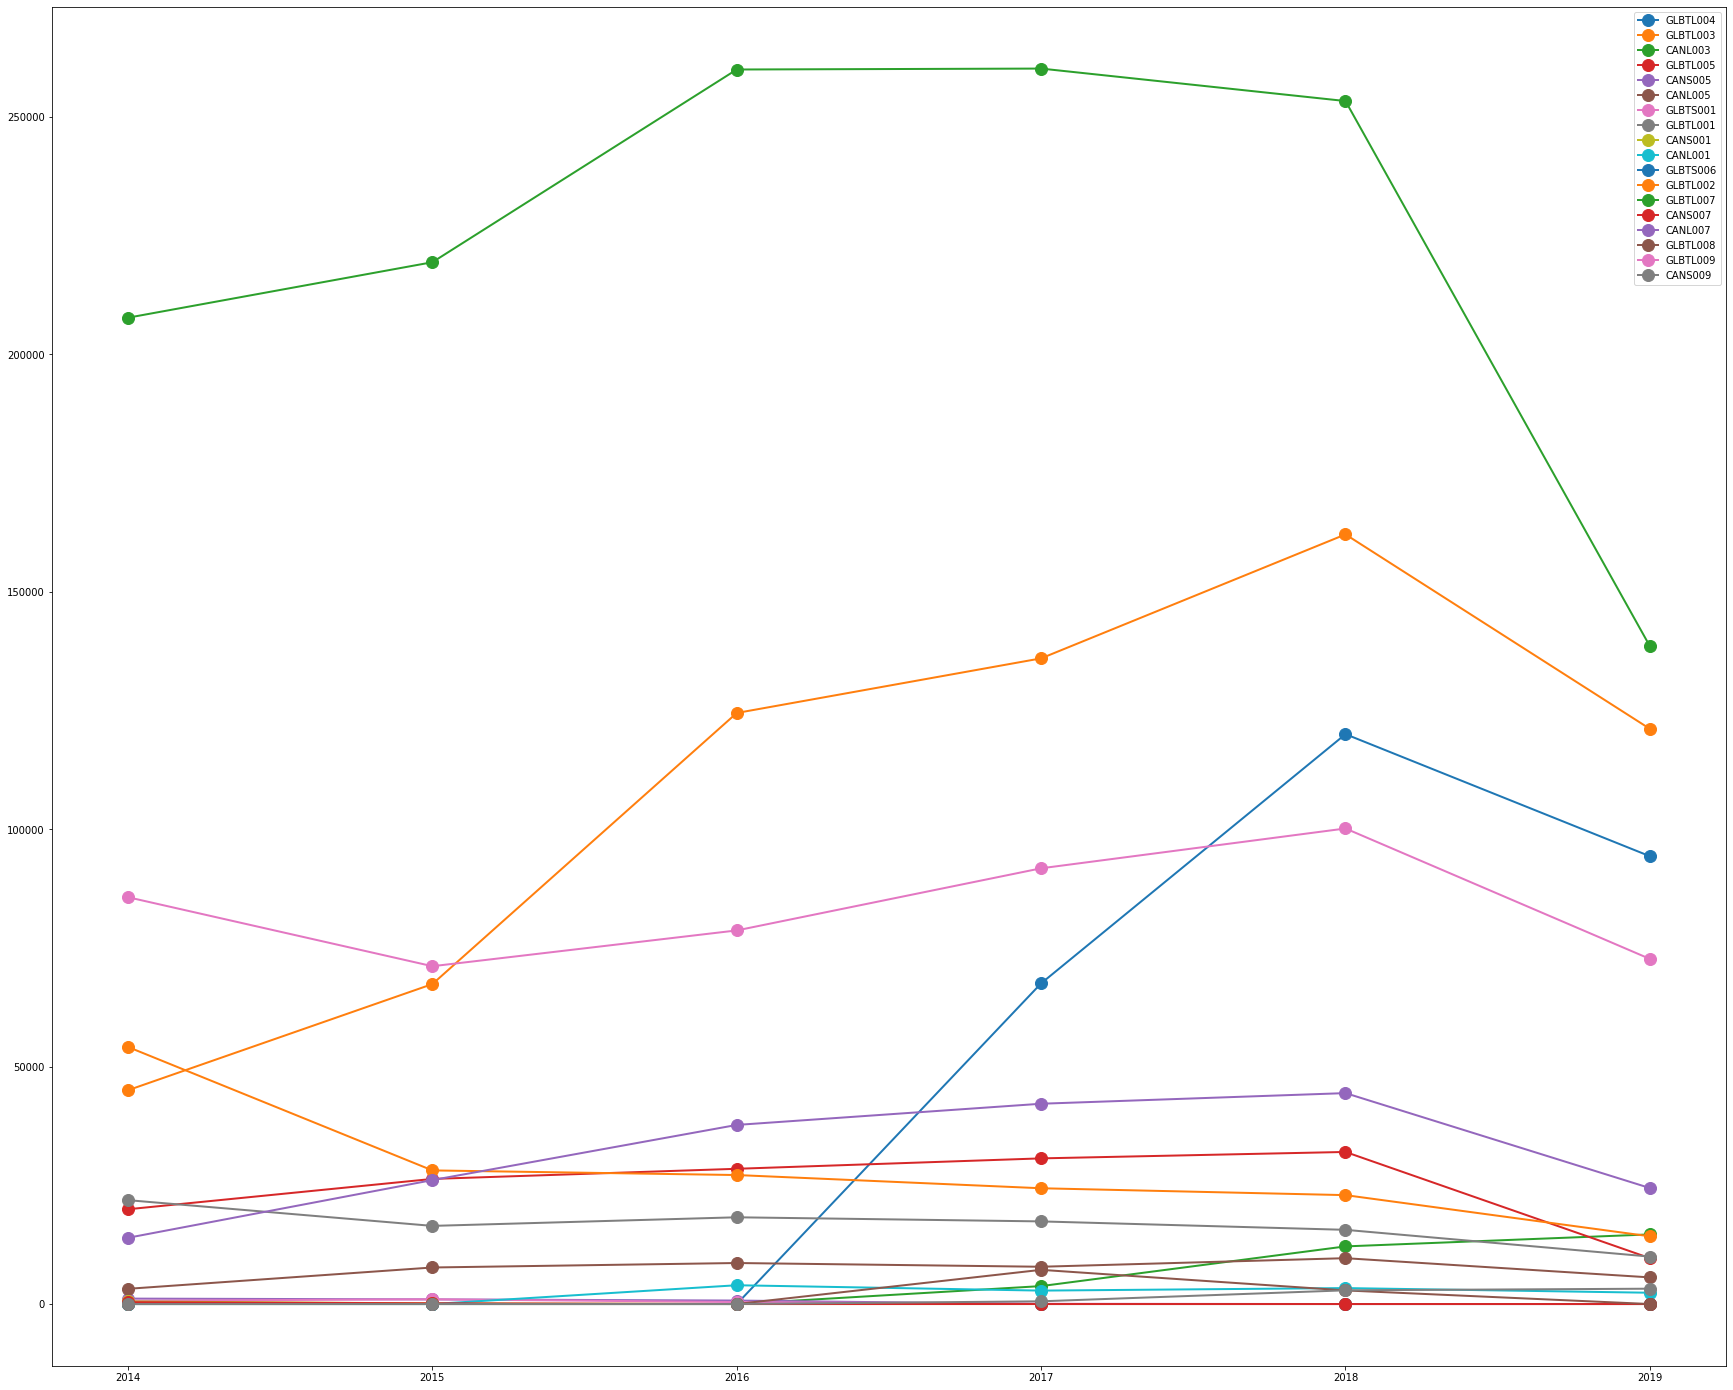

In [27]:
SKUs = ['GLBTL004','GLBTL003', 'CANL003', 'GLBTL005', 'CANS005','CANL005', 'GLBTS001', 'GLBTL001', 'CANS001', 'CANL001','GLBTS006', 'GLBTL002', 'GLBTL007', 'CANS007', 'CANL007','GLBTL008', 'GLBTL009', 'CANS009']
plt.figure(figsize=(30,25))
for i in SKUs:
    plot_volume_sales(i)
plt.legend(SKUs)
plt.savefig("Volume_sales_sku_yearly")

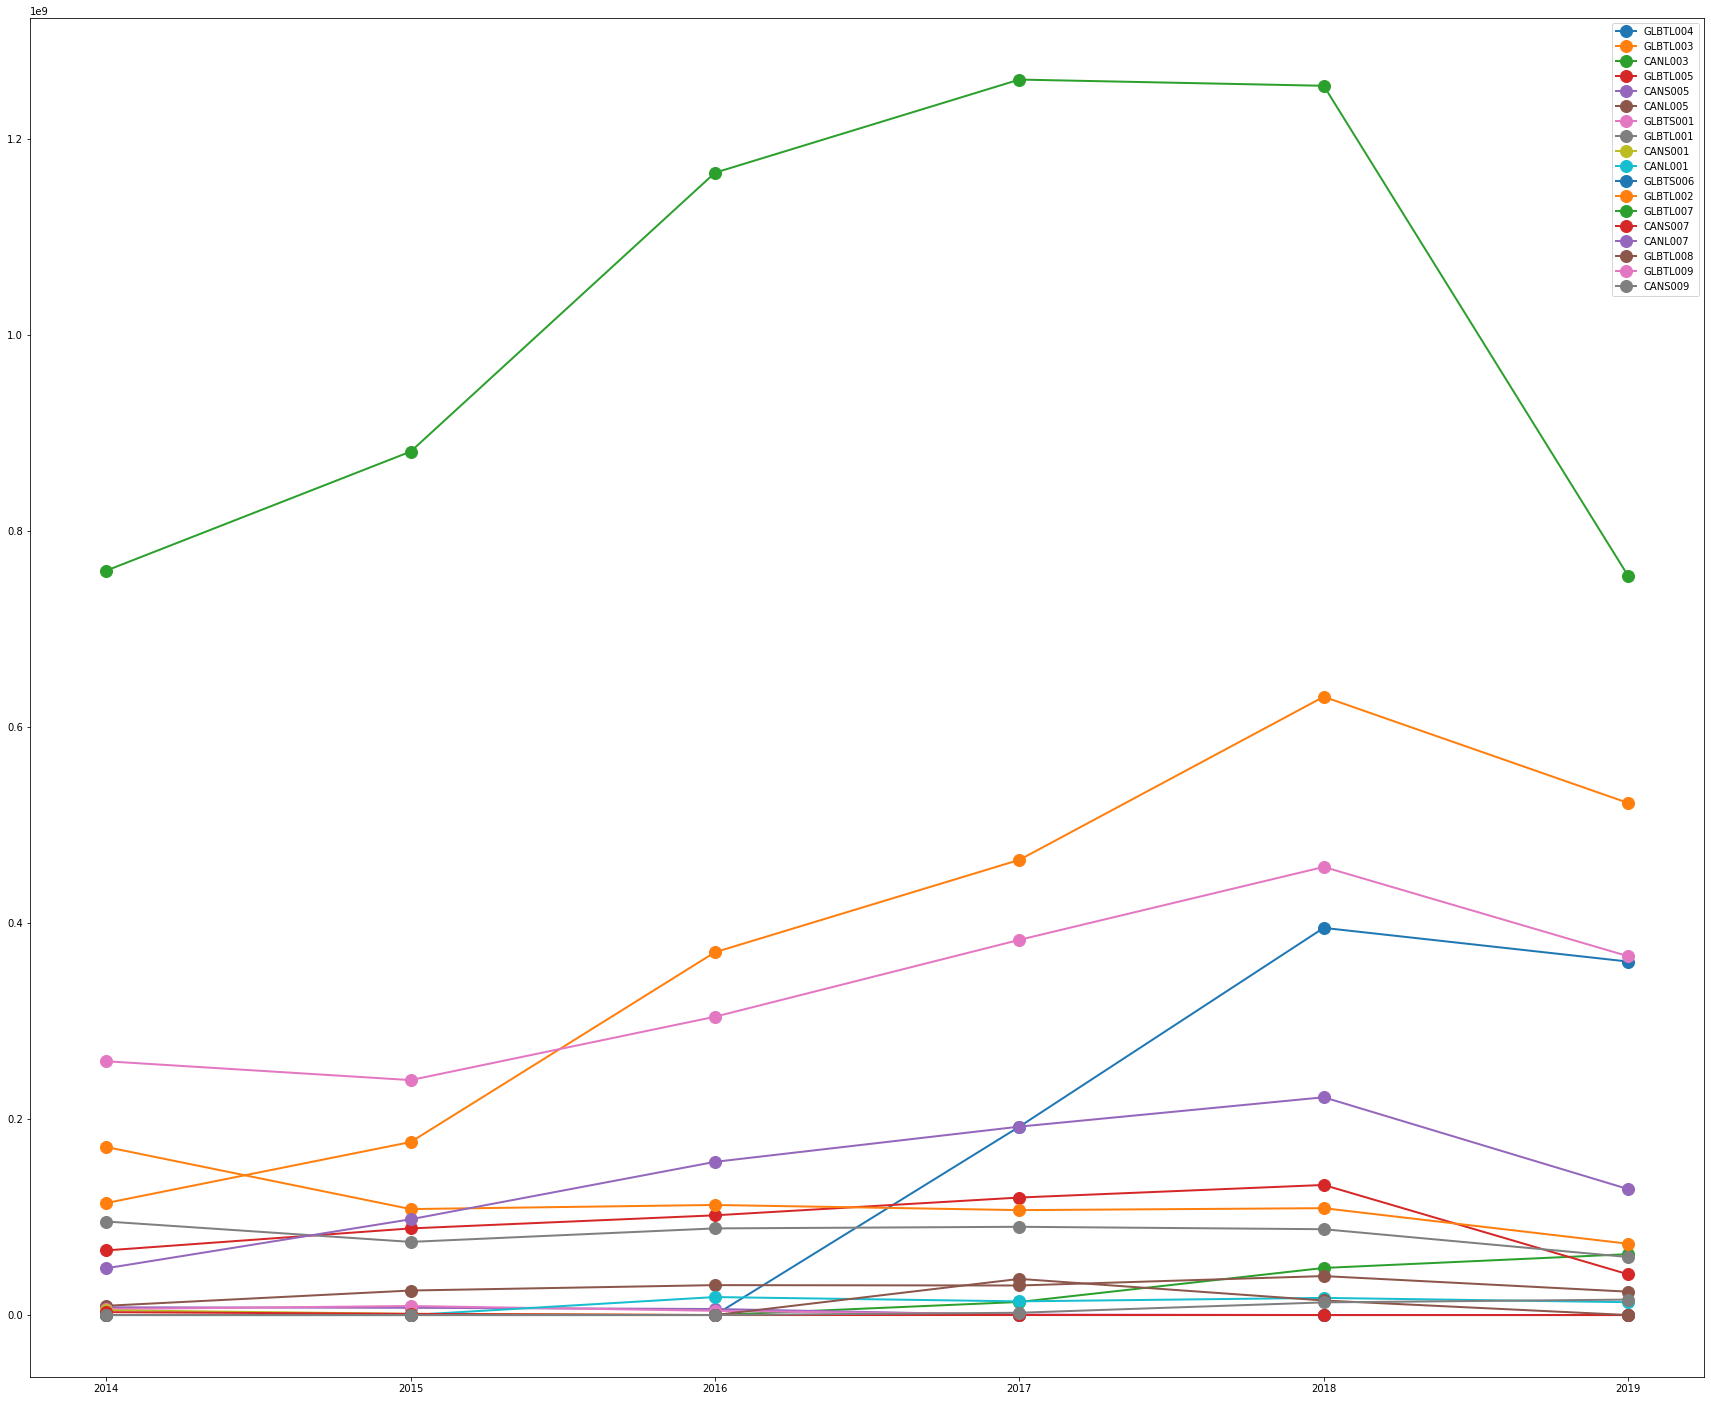

In [28]:
plt.figure(figsize=(30,25))
for i in SKUs:
    plot_revenue(i)
plt.legend(SKUs)
plt.savefig("revenu_sku_yearly")

In [11]:
dfCompany

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales,revenue
0,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Apr,1960.0,4480.86,1.351152e+07
1,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Aug,1825.0,6518.77,1.830270e+07
2,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Dec,1825.0,8784.75,2.466488e+07
3,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Jul,1825.0,10894.42,3.058818e+07
4,Brewer1,Company,Brand 4,Economy,Bottle,GLBTL004,650.0,2017,Jun,1825.0,7090.98,1.990929e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
2916,Brewer1,Company,Brand 9,U Mainstream,CAN,CANS009,500.0,2019,Jan,2392.0,84.90,4.061616e+05
2917,Brewer1,Company,Brand 9,U Mainstream,CAN,CANS009,500.0,2019,Jul,2720.0,193.20,1.051008e+06
2918,Brewer1,Company,Brand 9,U Mainstream,CAN,CANS009,500.0,2019,Jun,2392.0,822.66,3.935605e+06
2919,Brewer1,Company,Brand 9,U Mainstream,CAN,CANS009,500.0,2019,Mar,2392.0,598.62,2.863798e+06


In [12]:
revenue_by_company_bottle= dfCompany[dfCompany['PackType']=='Bottle']['revenue'].sum()
revenue_by_company_can= dfCompany[dfCompany['PackType']=='CAN']['revenue'].sum()
revenue_by_competitor_bottle= dfCompetitor[dfCompetitor['PackType']=='Bottle']['revenue'].sum()
revenue_by_competitor_can= dfCompetitor[dfCompetitor['PackType']=='CAN']['revenue'].sum()

In [13]:
print(f"Company revenue from bottle : {revenue_by_company_bottle} \nCompany revenue from Can : {revenue_by_company_can} \nCompetitor Revenue from Bottle : {revenue_by_competitor_bottle} \nCompetitor Revenue from Can : {revenue_by_competitor_can} ")
print("\n")
print(f"Company bottle market share : {(revenue_by_company_bottle*100 )/ (revenue_by_company_bottle+revenue_by_competitor_bottle)}")
print(f"Company can market share : {(revenue_by_company_can*100) / (revenue_by_company_can+revenue_by_competitor_can)}")

Company revenue from bottle : 13105936924.496803 
Company revenue from Can : 1251871669.5232725 
Competitor Revenue from Bottle : 5407319001.103004 
Competitor Revenue from Can : 382152537.02756727 


Company bottle market share : 70.79217711442179
Company can market share : 76.61279829910052


In [14]:
dfCompetitor['PackType'].value_counts()

Bottle    1483
CAN        607
Name: PackType, dtype: int64

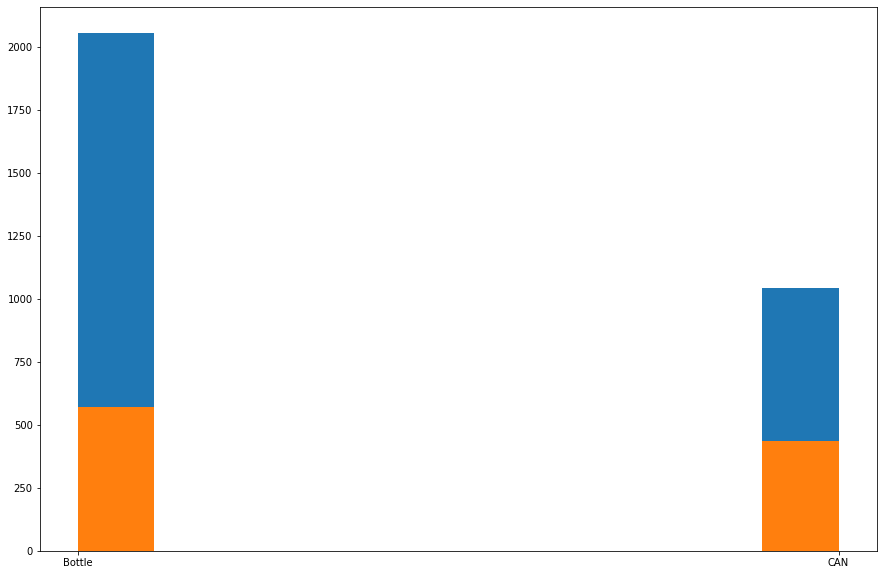

In [29]:
plt.figure(figsize=(15,10))
plt.hist(df['PackType'])
plt.hist(dfCompany['PackType'])
plt.savefig("Market Share")

In [16]:
dfCompetitor.head()

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales,revenue
30,Brewer2,Competitor,Brand 1,Economy,Bottle,NaN,650.0,2014,Apr,1444.0,600.60,1.334256e+06
31,Brewer2,Competitor,Brand 1,Economy,Bottle,NaN,650.0,2014,Aug,1444.0,495.30,1.100328e+06
32,Brewer2,Competitor,Brand 1,Economy,Bottle,NaN,650.0,2014,Dec,1444.0,454.05,1.008690e+06
33,Brewer2,Competitor,Brand 1,Economy,Bottle,NaN,650.0,2014,Feb,1444.0,100.23,2.226648e+05
34,Brewer2,Competitor,Brand 1,Economy,Bottle,NaN,650.0,2014,Jan,1444.0,163.80,3.638880e+05


In [17]:
dfCompetitor['PackSize'].value_counts()

650.0    1406
500.0     534
330.0     150
Name: PackSize, dtype: int64

In [18]:
dfCompany['Segment'].value_counts()

U Mainstream    388
L Mainstream    295
Premium         292
Economy          30
Name: Segment, dtype: int64

In [19]:
dfCompetitor['Segment'].value_counts()

Economy         1197
L Mainstream     719
U Mainstream     174
Name: Segment, dtype: int64

In [20]:
revenue_premium_company = dfCompany[dfCompany['Segment']=='Premium']['revenue'].sum()
revenue_economy_company = dfCompany[dfCompany['Segment']=='Economy']['revenue'].sum()
revenue_U_main_company  = dfCompany[dfCompany['Segment']=='U Mainstream']['revenue'].sum()
revenue_L_main_company  = dfCompany[dfCompany['Segment']=='L Mainstream']['revenue'].sum()

revenue_premium_competitor = dfCompetitor[dfCompetitor['Segment']=='Premium']['revenue'].sum()
revenue_economy_competitor = dfCompetitor[dfCompetitor['Segment']=='Economy']['revenue'].sum()
revenue_U_main_competitor  = dfCompetitor[dfCompetitor['Segment']=='U Mainstream']['revenue'].sum()
revenue_L_main_competitor  = dfCompetitor[dfCompetitor['Segment']=='L Mainstream']['revenue'].sum()




In [21]:
revenue_segment = pd.DataFrame()
revenue_segment['Player'] = ['Company','Competitor']
revenue_segment['Premium'] = [revenue_premium_company,revenue_premium_competitor]
revenue_segment['U_main'] = [revenue_U_main_company,revenue_U_main_competitor]

revenue_segment['L_main'] = [revenue_L_main_company,revenue_L_main_competitor]
revenue_segment['Economy'] = [revenue_economy_company,revenue_economy_competitor]

pd.set_option('display.float_format', lambda x: '%.0f' % x)
revenue_segment.head()


,Player,Premium,U_main,L_main,Economy
0,Company,584147251,9694233377,3131748915,947679051
1,Competitor,0,193826209,3304621109,2291024220


In [22]:
dfCompany['Segment'].unique()

array(['Economy', 'L Mainstream', 'Premium', 'U Mainstream'], dtype=object)

In [23]:
# print(f"Company revenue from bottle : {revenue_by_company_bottle} \nCompany revenue from Can : {revenue_by_company_can} \nCompetitor Revenue from Bottle : {revenue_by_competitor_bottle} \nCompetitor Revenue from Can : {revenue_by_competitor_can} ")
# print("\n")
print(f"Company premium market share : {(revenue_premium_company*100 )/ (revenue_premium_company+revenue_premium_competitor)}")
print(f"Company economy market share : {(revenue_economy_company*100) / (revenue_economy_company+revenue_economy_competitor)}")
print(f"Company U Mainstream market share : {(revenue_U_main_company*100) / (revenue_U_main_competitor+revenue_U_main_company)}")
print(f"Company L Mainstream market share : {(revenue_L_main_company*100) / (revenue_L_main_company+revenue_L_main_competitor)}")



Company premium market share : 100.0
Company economy market share : 29.261064439234914
Company U Mainstream market share : 98.03979529449941
Company L Mainstream market share : 48.6570676262494


In [24]:
# segments = ['Economy', 'L Mainstream', 'Premium', 'U Mainstream']

# for segment in segments:
#     df_seg_competitor = dfCompetitor[dfCompetitor['Segment']==segment]
#     d = {'per carton' :df_seg_competitor['W/s Price (per carton)'] , 'revenue' : df_seg_competitor['revenue'] }
#     df_seg_competitor_new = pd.DataFrame(d)

#     df_seg_competitor_new['per carton'] = (df_seg_competitor_new['per carton'] / 100).round(0)
#     df_seg_competitor_new
#     xx= df_seg_competitor_new.groupby('per carton').sum()
#     xx=xx.reset_index()

#     plt.plot(xx['per carton'],xx['revenue'],marker='o', linewidth=2, markersize=12)
#     plt.title(f"Competitor {segment}")
#     plt.savefig(f"Competitor {segment}")
#     plt.clf()

In [25]:
segments = ['Economy', 'L Mainstream', 'Premium', 'U Mainstream']

for segment in segments:
    df_seg_company = dfCompany[dfCompany['Segment']==segment]
    d = {'per carton' :df_seg_company['W/s Price (per carton)'] , 'revenue' : df_seg_company['revenue'] }
    df_compnay_seg_new = pd.DataFrame(d)

    df_compnay_seg_new['per carton'] = (df_compnay_seg_new['per carton'] / 100).round(0)
    df_compnay_seg_new
    xx_comp= df_compnay_seg_new.groupby('per carton').sum()
    xx_comp=xx_comp.reset_index()

    plt.plot(xx_comp['per carton'],xx_comp['revenue'],marker='o', linewidth=2, markersize=12)

    df_seg_competitor = dfCompetitor[dfCompetitor['Segment']==segment]
    d = {'per carton' :df_seg_competitor['W/s Price (per carton)'] , 'revenue' : df_seg_competitor['revenue'] }
    df_seg_competitor_new = pd.DataFrame(d)

    df_seg_competitor_new['per carton'] = (df_seg_competitor_new['per carton'] / 100).round(0)
    df_seg_competitor_new
    xx= df_seg_competitor_new.groupby('per carton').sum()
    xx=xx.reset_index()

    plt.plot(xx['per carton'],xx['revenue'],color="orange",marker='o', linewidth=2, markersize=12)

    plt.legend(['company','competitor'])
    plt.title(f"{segment}")
    plt.savefig(f"{segment}")

    plt.clf()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Competitor Economy')

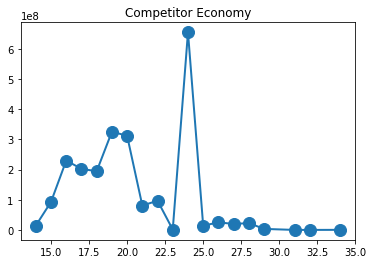

In [26]:
df_eco_competitior = dfCompetitor[dfCompetitor['Segment']=='Economy']

d = {'per carton' :df_eco_competitior['W/s Price (per carton)'] , 'revenue' : df_eco_competitior['revenue'] }
df_eco_competitior_new = pd.DataFrame(d)

df_eco_competitior_new['per carton'] = (df_eco_competitior_new['per carton'] / 100).round(0)
df_eco_competitior_new
xx= df_eco_competitior_new.groupby('per carton').sum()
xx=xx.reset_index()

plt.plot(xx['per carton'],xx['revenue'],marker='o', linewidth=2, markersize=12)
plt.title("Competitor Economy")